#Model Building Using Text Analysis

In [320]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set_style("whitegrid")
sns.set_context("poster")
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [375]:
#critics = pd.read_csv('comments1_with_sentimentsoriginal.csv')
critics = pd.read_csv('comments1_with_sentimentsoriginal.csv')
critics = critics.dropna(subset=['body', 'Answer1']) 
#let's drop rows with missing quotes
critics['positive'] = critics['Answer1'] >= 0
critics.head()


,Unnamed: 0,index,body,company,date,score,Worker1,Answer1,Avg,Date,positive
0,3L21G7IH4773YI2L6RV6T5G4RTC1YW,1199,"I shall do that! I was thinking ""I've had this...",Fitbit,1449270750,3,A2R0YYUAWNT7UD,2,2,2015-12-05 06:58:53 UTC,True
1,3I7KR83SNAOQ3IGZ6P98Z3JCRQR9KI,1178,Love it. Has helped keep me on track for weigh...,Fitbit,1449265917,2,A1NM7ZPZ3NH412,2,2,2015-12-05 06:59:05 UTC,True
2,3P7RGTLO6EO481Q4YVN8VYUWX89KA8,1174,I love it because I do not have to stop and pu...,Fitbit,1449251995,2,A3ITZNJQUTIZ4C,2,2,2015-12-05 07:02:17 UTC,True
3,373L46LKP7HF9UT8S10LOXXFNV3KJO,409,"I never wore a watch, now I wear an Apple Watc...",Apple,1449290608,1,A2R0YYUAWNT7UD,2,2,2015-12-05 06:59:32 UTC,True
4,3G9UA71JVV5REFMO97BCKSSTHB2J7G,1465,"The fallout soundtracks are great, but IMO the...",Spotify,1449249457,1,A1FP3SH704X01V,2,2,2015-12-05 06:59:41 UTC,True


In [376]:
critics['Answer1'] = critics['Answer1'].apply(int)

In [377]:
from pattern.vector import stem, PORTER, LEMMA
punctuation = r'[.,;:!?]'
import re
def num_sentence(body):
    return len(re.split(punctuation, body))
def num_word(sentence):
    return len(re.split(" ", sentence))

num_word = critics.body.apply(num_word)
num_sentence = critics.body.apply(num_sentence)
critics['num_word'] = num_word
critics['num_sentence'] = num_sentence
critics.head()



,Unnamed: 0,index,body,company,date,score,Worker1,Answer1,Avg,Date,positive,num_word,num_sentence
0,3L21G7IH4773YI2L6RV6T5G4RTC1YW,1199,"I shall do that! I was thinking ""I've had this...",Fitbit,1449270750,3,A2R0YYUAWNT7UD,2,2,2015-12-05 06:58:53 UTC,True,65,12
1,3I7KR83SNAOQ3IGZ6P98Z3JCRQR9KI,1178,Love it. Has helped keep me on track for weigh...,Fitbit,1449265917,2,A1NM7ZPZ3NH412,2,2,2015-12-05 06:59:05 UTC,True,11,3
2,3P7RGTLO6EO481Q4YVN8VYUWX89KA8,1174,I love it because I do not have to stop and pu...,Fitbit,1449251995,2,A3ITZNJQUTIZ4C,2,2,2015-12-05 07:02:17 UTC,True,17,1
3,373L46LKP7HF9UT8S10LOXXFNV3KJO,409,"I never wore a watch, now I wear an Apple Watc...",Apple,1449290608,1,A2R0YYUAWNT7UD,2,2,2015-12-05 06:59:32 UTC,True,22,3
4,3G9UA71JVV5REFMO97BCKSSTHB2J7G,1465,"The fallout soundtracks are great, but IMO the...",Spotify,1449249457,1,A1FP3SH704X01V,2,2,2015-12-05 06:59:41 UTC,True,26,5


In [378]:
grp = critics.groupby('company')

(array([   60.,     0.,   445.,     0.,     0.,  1325.,     0.,   340.,
            0.,    28.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <a list of 10 Patch objects>)

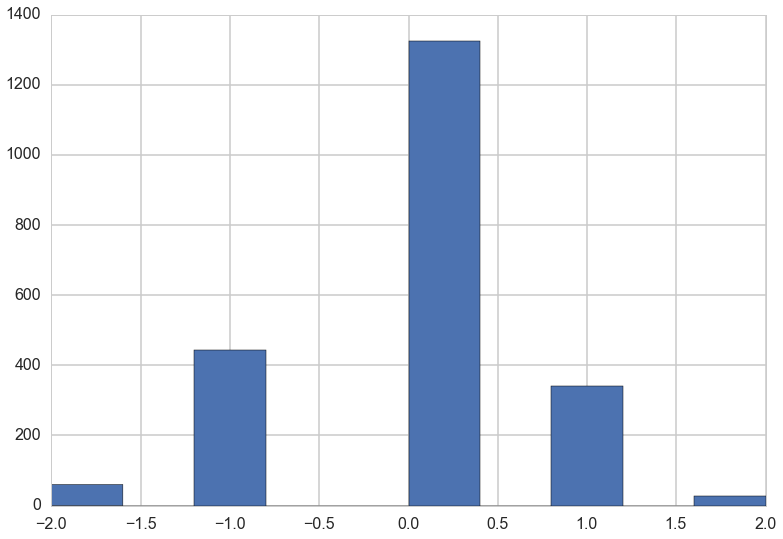

In [379]:
plt.hist(critics['Answer1'])

(array([  2.14100000e+03,   4.40000000e+01,   4.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([ -71.,   32.,  135.,  238.,  341.,  444.,  547.,  650.,  753.,
         856.,  959.]),
 <a list of 10 Patch objects>)

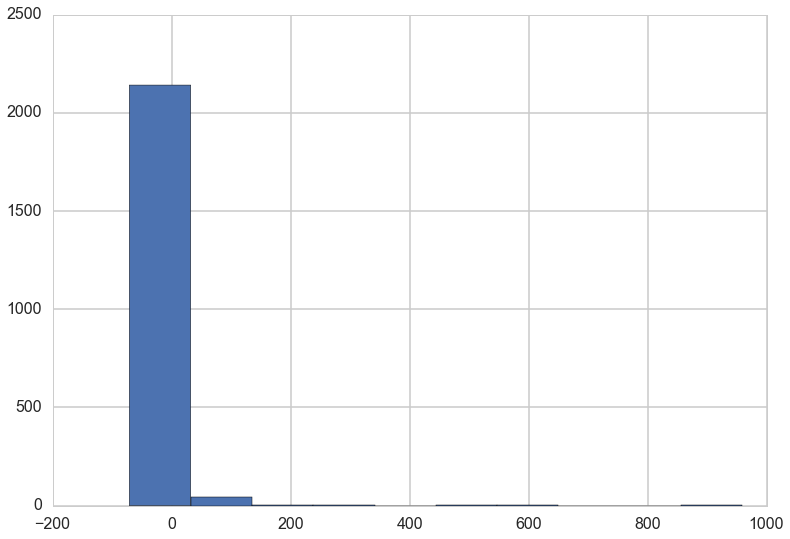

In [380]:
plt.hist(critics['score'])

#Validation Tools

In [385]:
def make_xy(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer(encoding = 'latin-1', strip_accents = 'ascii', stop_words='english')
    X = vectorizer.fit_transform(critics.body)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (critics.Answer1).values.astype(np.int)
    return X, y


def make_xyBinary(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer(encoding = 'latin-1', strip_accents = 'ascii', stop_words='english')
    X = vectorizer.fit_transform(critics.body)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (critics.positive).values.astype(np.int)
    return X, y
X, y = make_xy(critics)
Xbin, ybin = make_xyBinary(critics)

In [387]:

#train/test split the data
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
xbintrain, xbintest, ybintrain, ybintest = train_test_split(Xbin, ybin)

In [388]:
from sklearn.cross_validation import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [389]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    rotten = y < 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

In [390]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(critics.shape[0]), train_size=0.7)
mask=np.ones(critics.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

#Model Building Time

##MultiNomial Naive Bayes

In [391]:
#Multinomail Naive Bayes
clf = MultinomialNB()
clf = clf.fit(xtrain, ytrain)
training_accuracy = clf.score(xtrain, ytrain)
print "Naive Bayes"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

clfbin = MultinomialNB()
clfbin = clfbin.fit(xbintrain, ybintrain)
training_accuracy = clfbin.score(xbintrain, ybintrain)
print "Naive Bayes Binary"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "MN Accuracy: %0.2f%%" % (100 * clfbin.score(xbintest, ybintest))

Naive Bayes
Accuracy on training data: 0.86
MN Accuracy: 54.91%
Naive Bayes Binary
Accuracy on training data: 0.93
MN Accuracy: 72.55%


In [394]:
def validation(clf, binary= False):
    alphas = [0, .1, 1, 5, 10, 50]
    min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

    #Find the best value for alpha and min_df, and the best classifier
    best_alpha = None
    best_min_df = None
    maxscore=-np.inf
    for alpha in alphas:
        for min_df in min_dfs:         
            vectorizer = CountVectorizer(min_df = min_df, encoding = 'latin-1')
            if not binary:
                Xthis, ythis = make_xy(critics, vectorizer)
            else:
                Xthis, ythis = make_xyBinary(critics,vectorizer)
            Xtrainthis=Xthis[mask]
            ytrainthis=ythis[mask]
            #your code here
            clf = MultinomialNB(alpha=alpha)
            cvscore = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood)

            if cvscore > maxscore:
                maxscore = cvscore
                best_alpha, best_min_df = alpha, min_df
    return best_alpha, best_min_df
best_alpha1, best_min_df1 = validation(clf)
best_alpha2, best_min_df2 = validation(clf, binary = True)

In [397]:
vectorizer = CountVectorizer(min_df=best_min_df1, encoding = 'latin-1')
X, y = make_xy(critics, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha1).fit(xtrain, ytrain)

vectorizerbin = CountVectorizer(min_df=best_min_df2, encoding='latin-1')
Xbin, ybin = make_xyBinary(critics, vectorizer)
xbintrain=Xbin[mask]
ybintrain=ybin[mask]
xbintest=Xbin[~mask]
ybintest=ybin[~mask]

clfbin = MultinomialNB(alpha=best_alpha2).fit(xbintrain, ybintrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Parameter Optimized Naive Bayes"
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

training_accuracybin = clfbin.score(xbintrain, ybintrain)
test_accuracybin = clfbin.score(xbintest, ybintest)

print "Parameter Optimized Naive Bayes Binary"
print "Accuracy on training data: %0.2f" % (training_accuracybin)
print "Accuracy on test data:     %0.2f" % (test_accuracybin)



Parameter Optimized Naive Bayes
Accuracy on training data: 0.60
Accuracy on test data:     0.62
Parameter Optimized Naive Bayes Binary
Accuracy on training data: 0.77
Accuracy on test data:     0.78


##Random Forest

In [398]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, n_jobs=-1, class_weight = 'auto').fit(xtrain,ytrain)
rf_train_accuracy = rf.score(xtrain, ytrain)
print "Random Forest with Ranges"
print "Accuracy on training data: %0.2f" % (rf_train_accuracy)
print "RF Accuracy: %.02f%%" % (100*rf.score(xtest,ytest))

rfbin = RandomForestClassifier(n_estimators=100, min_samples_split=2, n_jobs=-1, class_weight = 'auto').fit(xbintrain,ybintrain)
rfbin_train_accuracy = rfbin.score(xbintrain, ybintrain)
print "Random Forest Binary Data"
print "Accuracy on training data: %0.2f" % (rfbin_train_accuracy)
print "RF Accuracy: %.02f%%" % (100*rfbin.score(xbintest,ybintest))

Random Forest with Ranges
Accuracy on training data: 0.94
RF Accuracy: 58.48%
Random Forest Binary Data
Accuracy on training data: 0.98
RF Accuracy: 76.97%


In [400]:
n_ests = [10, 20, 50, 100, 150, 200]
min_dfs = [0,.1,.01,.001,.0001,1]
max_depths = [5,10,15,20,25,40,50,70,80,90]

#Find the best value for alpha and min_df, and the best classifier
best_n_est = 10
# n_est = range(best_n_est-5, best_n_est+5)
# min_dfs = range(int(best_min_df), int(best_min_df+5.))
# max_depths = range(max_depth-5, max_depth+5)

# best_n_est = n_est[0]
maxscore=-np.inf
for max_depth in max_depths:
    for n_est in n_ests:  
        for min_df in min_dfs:
            vectorizer = CountVectorizer(min_df = min_df, encoding = 'latin-1')       
            Xthis, ythis = make_xy(critics, vectorizer)
            Xtrainthis=Xthis[mask]
            ytrainthis=ythis[mask]
            #your code here
            rf = RandomForestClassifier(n_estimators=n_est,max_depth = max_depth, min_samples_split=2, class_weight = 'auto', n_jobs=-1)
            cvscore = cv_score(rf, Xtrainthis, ytrainthis, log_likelihood)

            if cvscore > maxscore:
                maxscore = cvscore
                best_n_est, best_min_df, best_max_depth = n_est, min_df, max_depth

In [402]:
vectorizer = CountVectorizer(min_df=best_min_df, encoding = 'latin-1')
X, y = make_xy(critics, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

best_rf = RandomForestClassifier(n_estimators=best_n_est, min_samples_split=2, n_jobs=-1, class_weight= 'auto').fit(xtrain,ytrain)
rf_train_accuracy = best_rf.score(xtrain, ytrain)
rf_test_accuracy = best_rf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (rf_train_accuracy)
print "Accuracy on test %0.2f" % (rf_test_accuracy)

Accuracy on training data: 0.97
Accuracy on test 0.60


#Logistic Regression

In [403]:
#Logistic Regression
logistic = LogisticRegression(penalty="l1", class_weight = 'auto')
logistic = logistic.fit(xbintrain, ybintrain)
log_train_accuracy = logistic.score(xbintrain,ybintrain)
print "Logistic Regression"
print "Accuracy on training data: %0.2f" % (log_train_accuracy)
print "Logistic Accuracy: %.02f%%" % (100*logistic.score(xbintest,ybintest))

Logistic Regression
Accuracy on training data: 0.68
Logistic Accuracy: 66.52%


#Support Vector Machine

In [404]:
from sklearn.svm import SVC
clfsvm = SVC(kernel="linear").fit(xtrain, ytrain)
svm_accuracy= clfsvm.score(xtest, ytest)
print "Support Vector Machine"
print "Accuracy on training data: %0.2f" % (svm_accuracy)
print "Logistic Accuracy: %.02f%%" % (100*clfsvm.score(xtest,ytest))

Support Vector Machine
Accuracy on training data: 0.56
Logistic Accuracy: 55.76%


In [405]:
Cs = [.001,.01, .1, 1, 10]
min_dfs = [ 1e-4, 1e-3, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for c in Cs:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df, encoding = 'latin-1')
        Xthis, ythis = make_xyBinary(critics,vectorizer)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]
        #your code here
        svm = SVC(kernel = 'linear', C=c, probability = True)
        cvscore = cv_score(svm, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_c, best_min_df = c, min_df
            


In [406]:
best_c

0.01

In [407]:
vectorizer = CountVectorizer(min_df=best_min_df, encoding = 'latin-1')
X, y = make_xy(critics, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

best_svm = SVC(kernel = 'linear', C=best_c, class_weight = 'auto').fit(xtrain,ytrain)
svm_train_accuracy = best_svm.score(xtrain, ytrain)
svm_test_accuracy = best_svm.score(xtest, ytest)

print "Optimized SVM Parameters"
print "Accuracy on training data: %0.2f" % (svm_train_accuracy)
print "Accuracy on test %0.2f" % (svm_test_accuracy)

Optimized SVM Parameters
Accuracy on training data: 0.08
Accuracy on test 0.07


#Visualization of the Results

In [408]:
def calibration_plot(clf, xtest, ytest):
    prob = clf.predict_proba(xtest)[:, 1]
    outcome = ytest
    data = pd.DataFrame(dict(prob=prob, outcome=outcome))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical P(Fresh)")
    
    #the distribution of P(fresh)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    
    plt.xlabel("Predicted P(Fresh)")
    plt.ylabel("Number")

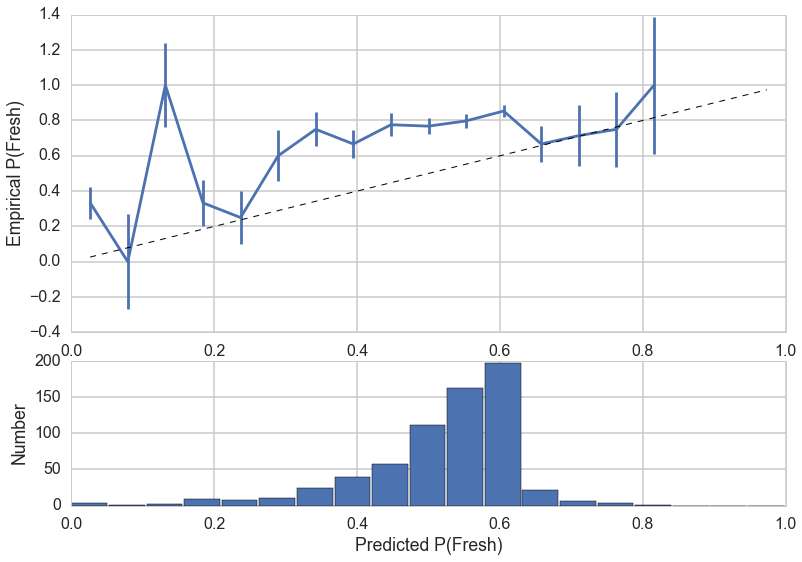

In [409]:
calibration_plot(logistic, xbintest, ybintest)

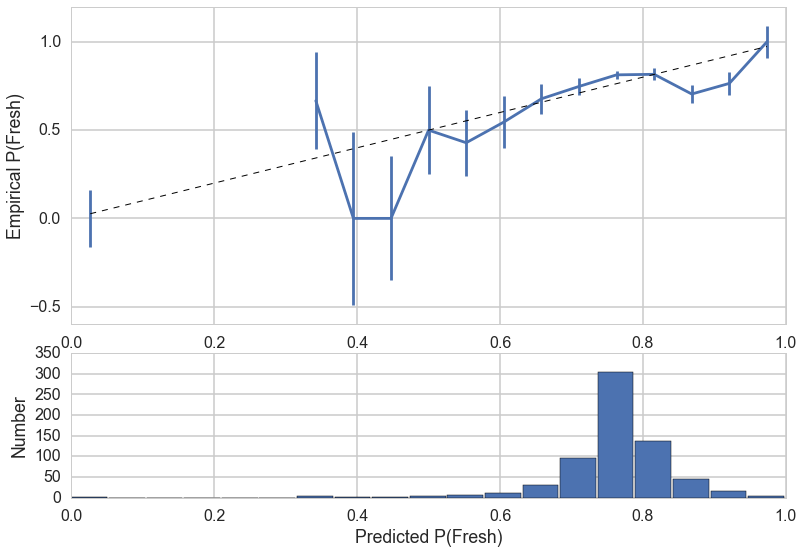

In [410]:
calibration_plot(clfbin, xbintest, ybintest)

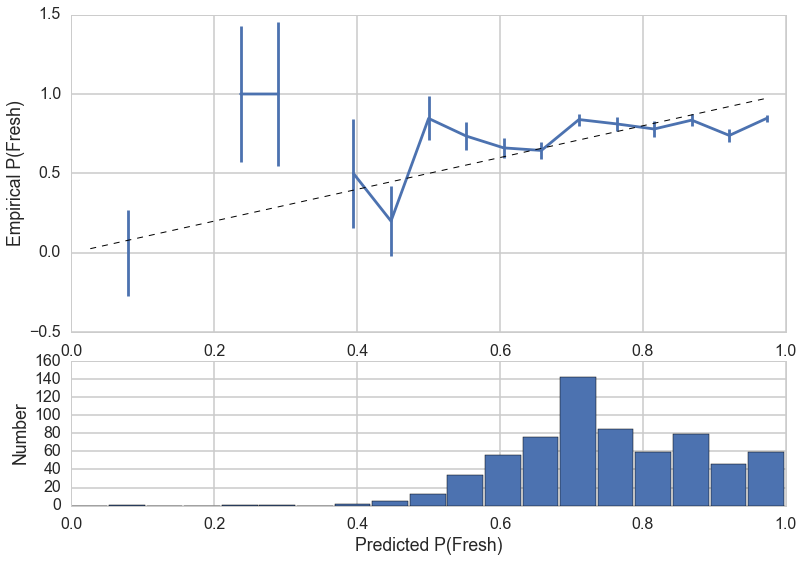

In [411]:
calibration_plot(rfbin, xbintest, ybintest)

#NLTK Sentiment with Naive Bayes Classifier

In [46]:
reddit = []
for row in range(len(critics.body)):
    words = critics.iloc[row].body.split()
    temp = (words, critics.iloc[row].Answer1)
    reddit.append(temp)

    

In [413]:
#http://www.laurentluce.com/posts/twitter-sentiment-analysis-using-python-and-nltk/
import nltk
def get_words(reddits):
    all_words = []
    for (a, b) in reddits:
        all_words.extend(a)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features


In [414]:
word_features = get_word_features(get_words(reddit))
#print word_features

In [415]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [416]:
#extract_features(reddit[1])
training_set = nltk.classify.apply_features(extract_features, reddit)

In [425]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [426]:
print 'accuracy:', nltk.classify.util.accuracy(classifier, training_set)
classifier.show_most_informative_features()

accuracy: 0.755687973998
Most Informative Features
        contains(great,) = True                2 : 0      =     85.5 : 1.0
      contains(awesome.) = True                2 : 0      =     51.3 : 1.0
      contains(Spotify.) = True                2 : 0      =     51.3 : 1.0
     contains(painfully) = True                2 : 0      =     51.3 : 1.0
       contains(Really?) = True                2 : 0      =     51.3 : 1.0
       contains(tracker) = True                2 : 0      =     51.3 : 1.0
           contains(Has) = True                2 : 0      =     51.3 : 1.0
           contains(us,) = True                2 : 0      =     51.3 : 1.0
           contains(IMO) = True                2 : 0      =     51.3 : 1.0
          contains(far.) = True                2 : 0      =     51.3 : 1.0


#Final Predictions

In [269]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xyBinary(critics, vectorizer)

In [297]:
prediction = logistic.predict(Xbin)
critics['prediction_binary'] = prediction


In [298]:
critics['prediction'] = prediction*critics['score']

In [299]:
company = critics.groupby('company').agg({'prediction':np.mean})
company2 = critics.groupby('company').agg({'prediction_binary':np.mean})

In [300]:
grp = critics.groupby('company')

In [301]:
names = []
for a,b in grp:
    names.append(a)

In [302]:
values = []
for i in company.values:
    values.append(i[0])
values2 = []
for i in company2.values:
    values2.append(i[0])

In [303]:
final = pd.DataFrame()
final['weighted_predict'] = values
final['name'] = names
final['predict_binary'] = values2

In [304]:
final.head()

,weighted_predict,name,predict_binary
0,-0.176471,Airbnb,0.117647
1,-0.246377,Amazon,-0.144928
2,-1.156124,Apple,-0.067295
3,1.000000,Asana,1.000000
4,0.000000,Buzzfeed,-2.000000


In [305]:
final.to_csv("company_with_predictions.csv")

#Predictions with Categories

In [217]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(critics, vectorizer)

In [259]:
prediction = best_rf.predict(X)

In [226]:
critics['prediction_range_range'] = prediction


In [227]:
critics['prediction_range'] = prediction*critics['score']

In [228]:
company_range = critics.groupby('company').agg({'prediction_range':np.mean})

In [229]:
weight_values = []
for i in company_range.values:
    weight_values.append(i[0])

In [230]:
final_weight = pd.DataFrame()
final_weight['weighted_predict_range'] = weight_values
final_weight['name'] = names

In [231]:
final_weight.to_csv("company_with_prediction_range.csv")

#Second Model Using Text Characteristics

In [198]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

In [232]:
ols_model = ols('Answer1 ~prediction_range_range + num_word:num_sentence + num_word ', critics).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Answer1   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     993.9
Date:                Wed, 09 Dec 2015   Prob (F-statistic):               0.00
Time:                        20:54:49   Log-Likelihood:                -1053.2
No. Observations:                1846   AIC:                             2114.
Df Residuals:                    1842   BIC:                             2137.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0.0195      0.014      1.429      0.153        -0.007     0.046
prediction_range_range     0.9220      0.017     54.029      0.000         0.889     0.955
num_word:num_sentence  -2.045e-07   7.53e-06     -0.027      0.978      -1.5e-05  1.46e-05
num_word                  -0.0001      0.000     -0.318      0.750        -0.001     0.001
==============================================================================
Omnibus:                      309.978   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4617.647
Skew:                           0.288   Prob(JB):                         0.00
Kurtosis:                      10.727   Cond. No.                     3.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [233]:
y = ols_model.predict(critics)

In [236]:
critics['prediction_range'] = y*critics['score']
critics['range'] = y

company_range = critics.groupby('company').agg({'prediction_range':np.mean})
company_range2 = critics.groupby('company').agg({'range':np.mean})
weight_values = []
for i in company_range.values:
    weight_values.append(i[0])
    
weight = []
for i in company_range2.values:
    weight.append(i[0])
final_weight = pd.DataFrame()
final_weight['weighted_predict_range'] = weight_values
final_weight['name'] = names
final_weight['predict_range'] = weight
final_weight.to_csv("company_with_prediction_range.csv")

In [309]:
ols_model = ols('Answer1 ~prediction+ num_word:num_sentence + num_word ', critics).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Answer1   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     8.228
Date:                Wed, 09 Dec 2015   Prob (F-statistic):           1.94e-05
Time:                        22:48:56   Log-Likelihood:                -1929.5
No. Observations:                1846   AIC:                             3867.
Df Residuals:                    1842   BIC:                             3889.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.0231      0.022      1.052      0.293        -0.020     0.066
prediction               -0.0008      0.001     -0.664      0.507        -0.003     0.002
num_word:num_sentence  2.457e-05   1.21e-05      2.028      0.043      8.05e-07  4.83e-05
num_word                 -0.0026      0.001     -4.299      0.000        -0.004    -0.001
==============================================================================
Omnibus:                       21.507   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.564
Skew:                          -0.025   Prob(JB):                     1.89e-08
Kurtosis:                       3.678   Cond. No.                     3.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [310]:
ybintest

array([ 2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0